# 1.1.1 Пример

0.9999999999999999 -0.9499999999999995


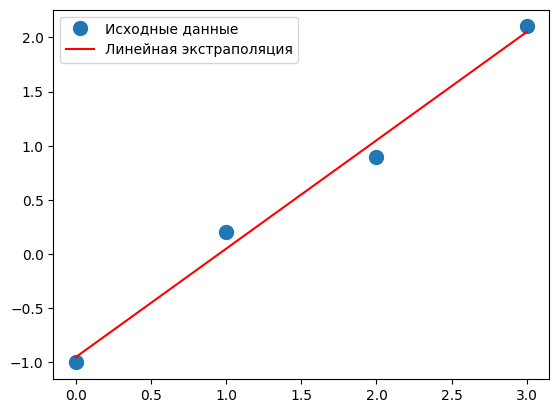

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

# 1.1.2 Пример

[-5.03366567 -3.95065051 -3.44871807 -2.37191413 -0.98589767  0.25211795
  0.79477581  1.99728408  3.25089936  4.24198602  5.1697228 ]
[25.27159977 15.56966789  9.25333434  3.5641576   0.60810931 -0.20623336
  0.82486571  4.19676437  8.70930071 16.19891443 24.76549934]


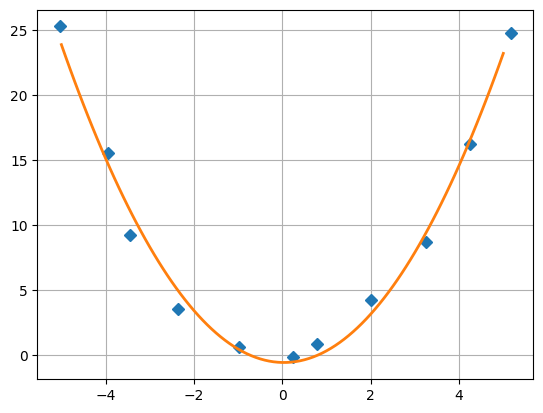

In [2]:
from numpy import *
from numpy.random import *

#Сгенерируем случайные x и у 
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5) 
x += delta*(rand(11)-0.5)

# записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

#Нахождение коэффициентов функции вида у = ах^2 + Ьх + с методом наименьших квадратов
#задаем вектор т = [х**2, х, Е]
m = vstack((x**2, x, ones(11))).T

#находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)

#рисуем точки
plt.plot(x, y, 'D')

#рисуем кривую вида у = ахЛ2 + Ьх + с, подставляя из решения коэффициенты з[0], s[l]j s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

# 1.1.3 Пример

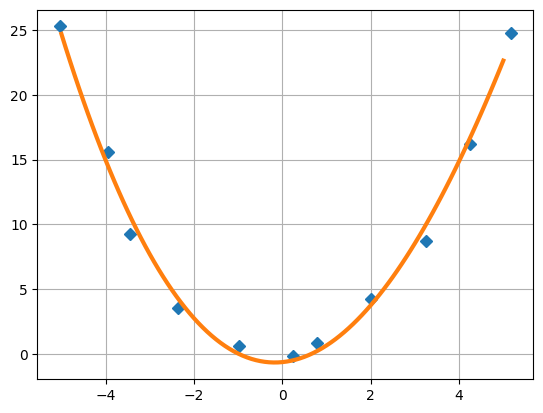

In [3]:
#Решение
#Нахождение коэффициентов функции вида у = ах^3 + bх^2 + сх + d методом наименьших квадратов
#задаем вектор т = [x**3, х, Е]
m = vstack((x**3, x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
#рисуем точки
plt.plot(x, y, 'D')
#рисуем кривую вида у = ах^3 + bx^2 + сх + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# 1.1.4 Пример

0.0001931881539140788
0.09637890889387123


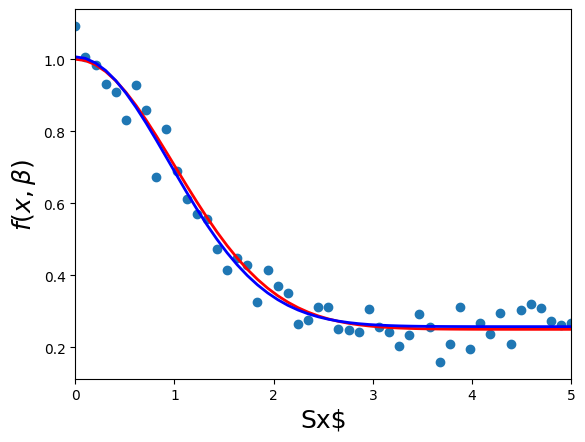

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.09240686 1.00478852 0.98282713 0.93195805 0.90904402 0.83002033
 0.92893257 0.85908515 0.67353761 0.80663253 0.69044038 0.61286916
 0.57072944 0.55607587 0.47230247 0.41514758 0.44765868 0.42976532
 0.32580523 0.41453025 0.37037312 0.35184269 0.2650231  0.27511529
 0.31100358 0.31295096 0.25167967 0.24807712 0.24334195 0.30535618
 0.2561044  0.24142673 0.20248766 0.23450153 0.29293649 0.25741749
 0.15960263 0.20945317 0.31234062 0.19

In [18]:
import scipy as sp
from scipy.optimize import curve_fit

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

#зададим массив точек хi
xdata = np.linspace(0, 5, 50)

#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
beta_opt

#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"Sx$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)